In [1]:
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv('international-airline-passengers.csv',usecols =[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]



In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [6]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0]-k):
        x = data[i:i + k,0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)    
        

In [7]:
look_back = 12
testX, testY =create_dataset(test,look_back)
trainX, trainY= create_dataset(train,look_back)


In [8]:

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [9]:
from keras import Sequential
from keras.layers import SimpleRNN,Dense

In [15]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(trainX, trainY, epochs = 18, batch_size = 1)

Epoch 1/18


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6771
Epoch 2/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167
Epoch 3/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0958
Epoch 4/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0834
Epoch 5/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0602
Epoch 6/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453
Epoch 7/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0431
Epoch 8/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310
Epoch 9/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360
Epoch 10/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0366
Epoch 11/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446
Epoch 12/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245
Epoch 13/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216  
Epoch 14/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264
Epoch 15/18
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237
Epoch 16/18
84/84 ━━━━━━━━━━

In [16]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

testPredict

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((36,), (36,))

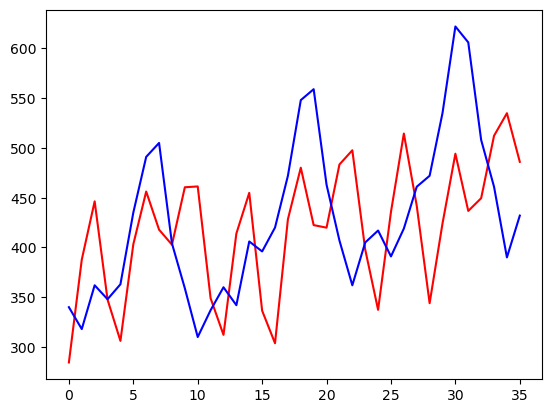

In [19]:
import matplotlib.pyplot as plt

plt.plot(testPredict, 'r')
plt.plot(testTrue,'b')
plt.show()

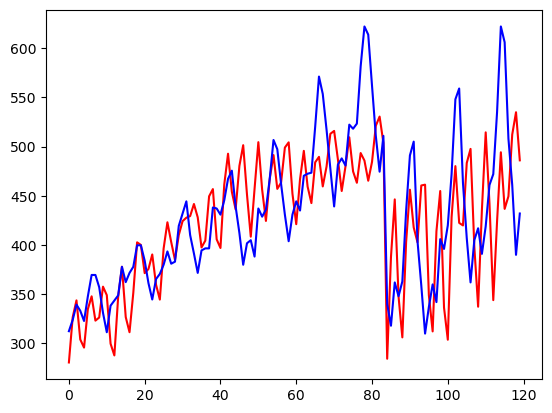

In [21]:
CombinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))

plt.plot(CombinedPredicted, 'r')
plt.plot(combinedTrue, 'b')
plt.show()